In [3]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 36.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]m6/7 [seaborn]ib]


In [4]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

df = pd.read_csv("Netflix_Expanded_Movie_Dataset.csv")
df.head()

,user_id,session_id,timestamp,device,page,duration_seconds,movie
0,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Recommendations,133.07,Fixed
1,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,MovieDetail,250.55,Fixed
2,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Home,156.72,NaN
3,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Playback,277.33,Fixed
4,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Recommendations,11.14,Fixed


/var/folders/0c/3kq_pvgx38b6d7vx10nhqzw80000gn/T/ipykernel_95383/2547588215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')


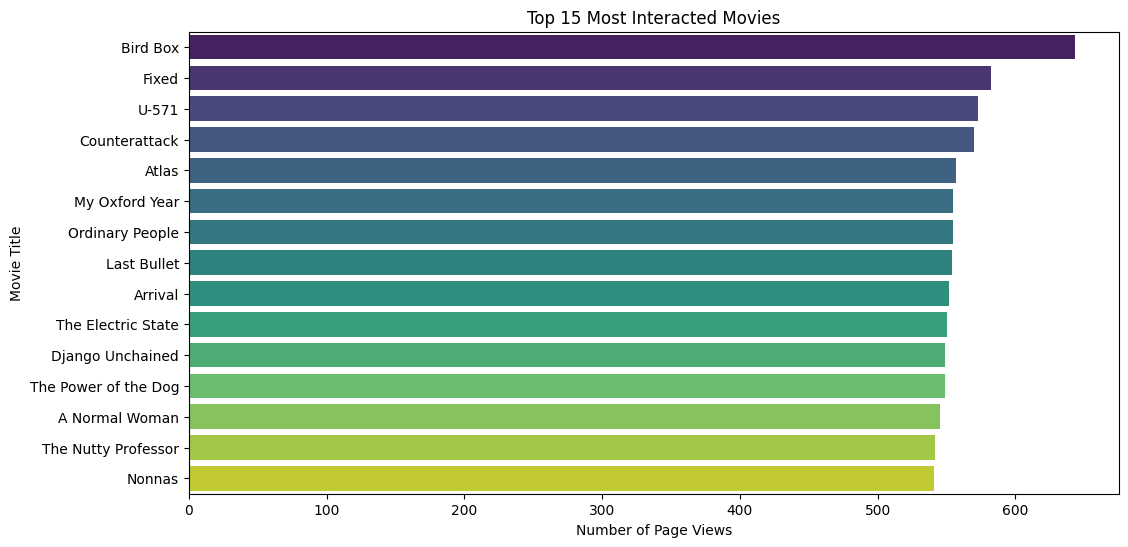

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count non-null movie entries
top_movies = df['movie'].dropna().value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')
plt.title("Top 15 Most Interacted Movies")
plt.xlabel("Number of Page Views")
plt.ylabel("Movie Title")
plt.show()

In [10]:
# Step 1: Aggregate user behavior
user_behavior = df.groupby("user_id").agg({
    "session_id": pd.Series.nunique,
    "device": pd.Series.nunique,
    "movie": pd.Series.nunique,
    "duration_seconds": "mean"
}).reset_index()

user_behavior.columns = ["user_id", "num_sessions", "num_devices", "num_unique_movies", "avg_session_duration"]

user_behavior.head()

,user_id,num_sessions,num_devices,num_unique_movies,avg_session_duration
0,0032770f-b661-4144-ba4f-2f6345ec7cbe,9,4,9,162.082167
1,0035d342-8ea2-4821-b8f5-4dbf055f769a,9,5,9,144.011967
2,0054741a-493d-401b-bc7b-87eec1905af0,7,3,7,158.857143
3,00571850-9c16-4145-a0a6-45766daf68fa,4,2,4,151.570769
4,006587f6-f4d5-40f7-ae51-57987127e9f0,10,7,10,153.409394


In [11]:
from sklearn.preprocessing import StandardScaler

features = user_behavior[["num_sessions", "num_devices", "num_unique_movies", "avg_session_duration"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
user_behavior["cluster"] = kmeans.fit_predict(X_scaled)

user_behavior.head()

,user_id,num_sessions,num_devices,num_unique_movies,avg_session_duration,cluster
0,0032770f-b661-4144-ba4f-2f6345ec7cbe,9,4,9,162.082167,2
1,0035d342-8ea2-4821-b8f5-4dbf055f769a,9,5,9,144.011967,2
2,0054741a-493d-401b-bc7b-87eec1905af0,7,3,7,158.857143,1
3,00571850-9c16-4145-a0a6-45766daf68fa,4,2,4,151.570769,3
4,006587f6-f4d5-40f7-ae51-57987127e9f0,10,7,10,153.409394,2


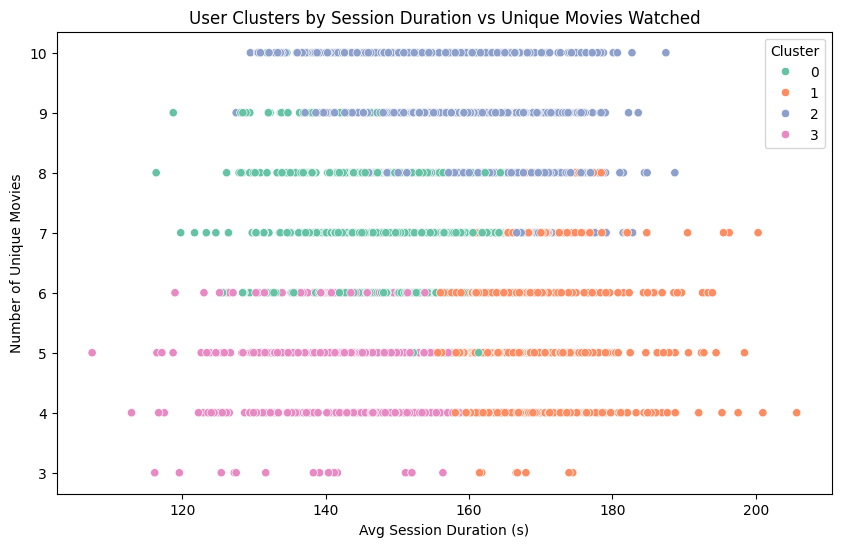

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_behavior, x="avg_session_duration", y="num_unique_movies", hue="cluster", palette="Set2")
plt.title("User Clusters by Session Duration vs Unique Movies Watched")
plt.xlabel("Avg Session Duration (s)")
plt.ylabel("Number of Unique Movies")
plt.legend(title="Cluster")
plt.show()

In [14]:
user_behavior.groupby("cluster").mean(numeric_only=True)

,num_sessions,num_devices,num_unique_movies,avg_session_duration
cluster,,,,
0,7.311140,4.615877,7.148528,148.976832
1,5.274119,3.781011,5.186830,168.827782
2,9.225480,5.469161,9.035389,157.553024
3,4.736568,3.381282,4.656846,143.847227


In [15]:
user_behavior["cluster"].value_counts().sort_index()

cluster
0    781
1    653
2    989
3    577
Name: count, dtype: int64

In [16]:
# Sort data by user and time
df_sorted = df.sort_values(by=["user_id", "timestamp"])

# Shift pages to create prev → next transitions
df_sorted["next_page"] = df_sorted.groupby("session_id")["page"].shift(-1)
df_sorted["prev_page"] = df_sorted["page"]
df_sorted["movie_present"] = df_sorted["movie"].notna().astype(int)

# Only keep rows with a valid next_page
transitions = df_sorted.dropna(subset=["next_page"])

# Select features
transitions = transitions[["prev_page", "next_page", "device", "duration_seconds", "movie_present"]]
transitions.head()

,prev_page,next_page,device,duration_seconds,movie_present
42325,Recommendations,MovieDetail,Tablet,234.15,1
42326,MovieDetail,MovieDetail,Tablet,30.96,1
42327,MovieDetail,Genre,Tablet,132.31,1
42328,Genre,Home,Tablet,287.28,1
42329,Home,Recommendations,Tablet,28.41,0


In [17]:
from sklearn.preprocessing import LabelEncoder

le_prev = LabelEncoder()
le_next = LabelEncoder()
le_device = LabelEncoder()

transitions["prev_page_enc"] = le_prev.fit_transform(transitions["prev_page"])
transitions["next_page_enc"] = le_next.fit_transform(transitions["next_page"])
transitions["device_enc"] = le_device.fit_transform(transitions["device"])

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and target
X = transitions[["prev_page_enc", "device_enc", "duration_seconds", "movie_present"]]
y = transitions["next_page_enc"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_next.classes_))

                 precision    recall  f1-score   support

          Genre       0.17      0.17      0.17      3894
           Home       0.16      0.16      0.16      3787
    MovieDetail       0.17      0.17      0.17      3826
       Playback       0.17      0.17      0.17      3807
Recommendations       0.16      0.17      0.16      3809
         Search       0.18      0.17      0.17      3893

       accuracy                           0.17     23016
      macro avg       0.17      0.17      0.17     23016
   weighted avg       0.17      0.17      0.17     23016



In [19]:
df_sorted = df.sort_values(by=["user_id", "timestamp"])

# Count page number in session (session position)
df_sorted["page_number"] = df_sorted.groupby("session_id").cumcount() + 1

# Total pages in session
session_sizes = df_sorted.groupby("session_id")["page"].count().rename("session_length")
df_sorted = df_sorted.merge(session_sizes, on="session_id")

# Add next_page and movie_present
df_sorted["next_page"] = df_sorted.groupby("session_id")["page"].shift(-1)
df_sorted["movie_present"] = df_sorted["movie"].notna().astype(int)

# Filter usable rows
transitions = df_sorted.dropna(subset=["next_page"]).copy()

# Label encode
transitions["prev_page_enc"] = le_prev.fit_transform(transitions["page"])
transitions["next_page_enc"] = le_next.fit_transform(transitions["next_page"])
transitions["device_enc"] = le_device.fit_transform(transitions["device"])

In [20]:
features = [
    "prev_page_enc", "device_enc", "duration_seconds", "movie_present",
    "page_number", "session_length"
]

X = transitions[features]
y = transitions["next_page_enc"]

# Split + train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Report
print(classification_report(y_test, y_pred, target_names=le_next.classes_))

                 precision    recall  f1-score   support

          Genre       0.17      0.17      0.17      3894
           Home       0.17      0.17      0.17      3787
    MovieDetail       0.16      0.16      0.16      3826
       Playback       0.16      0.17      0.16      3807
Recommendations       0.16      0.16      0.16      3809
         Search       0.17      0.17      0.17      3893

       accuracy                           0.17     23016
      macro avg       0.17      0.17      0.17     23016
   weighted avg       0.17      0.17      0.17     23016



In [21]:
# Sort the dataframe by session and time
df_sorted = df.sort_values(by=["user_id", "timestamp"])

# Get current and next page within each session
df_sorted["next_page"] = df_sorted.groupby("session_id")["page"].shift(-1)

# Drop rows where next_page is NaN
transitions = df_sorted.dropna(subset=["next_page"])
transitions = transitions[["page", "next_page"]]


In [22]:
# Count how many times each transition happens
transition_counts = transitions.groupby(["page", "next_page"]).size().unstack().fillna(0)

# Normalize to get probabilities
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
transition_matrix

next_page,Genre,Home,MovieDetail,Playback,Recommendations,Search
page,,,,,,
Genre,0.165565,0.167803,0.167126,0.166190,0.164317,0.168999
Home,0.170664,0.165021,0.161154,0.166902,0.168156,0.168104
MovieDetail,0.168343,0.162738,0.167243,0.167400,0.169233,0.165043
Playback,0.164893,0.164997,0.168060,0.172109,0.164322,0.165620
Recommendations,0.168355,0.167212,0.162953,0.165965,0.167628,0.167887
Search,0.162586,0.166614,0.164940,0.170642,0.167294,0.167922


In [23]:
current_page = "Search"
next_probs = transition_matrix.loc[current_page].sort_values(ascending=False)
print(next_probs)

next_page
Playback           0.170642
Search             0.167922
Recommendations    0.167294
Home               0.166614
MovieDetail        0.164940
Genre              0.162586
Name: Search, dtype: float64


In [25]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.2 MB/s eta 0:00:00


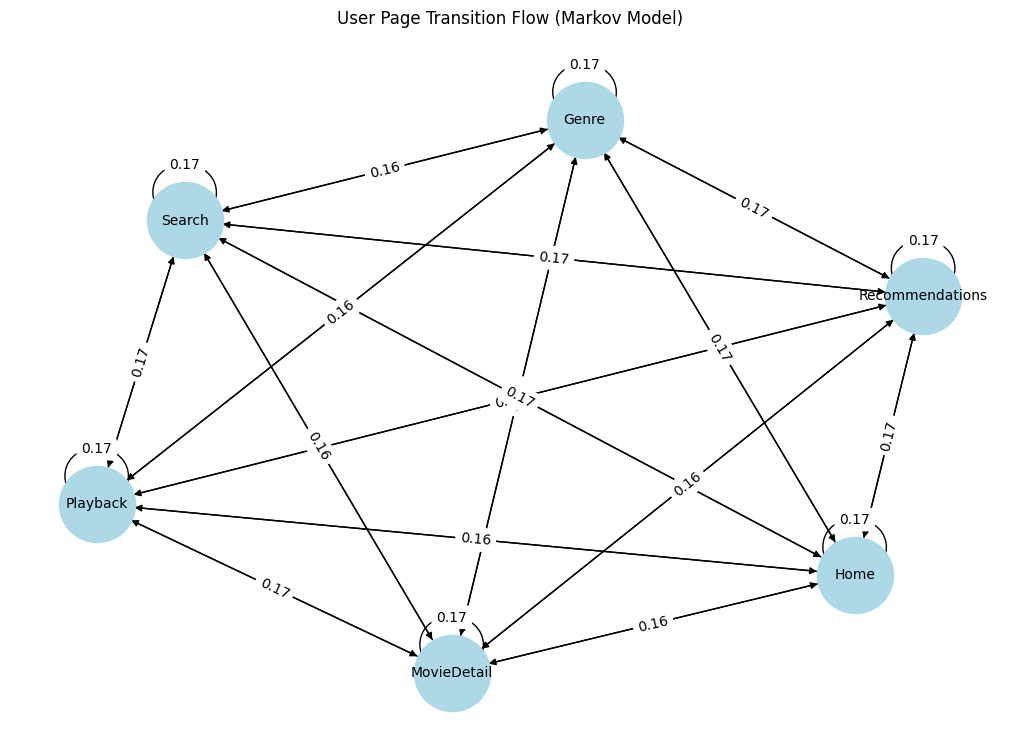

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add edges with weights
for from_page in transition_matrix.index:
    for to_page in transition_matrix.columns:
        prob = transition_matrix.loc[from_page, to_page]
        if prob > 0.05:
            G.add_edge(from_page, to_page, weight=round(prob, 2))

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("User Page Transition Flow (Markov Model)")
plt.show()

In [27]:
import random

def simulate_user_journey(start_page="Home", steps=10):
    journey = [start_page]
    for _ in range(steps):
        current = journey[-1]
        probs = transition_matrix.loc[current]
        next_page = random.choices(probs.index, weights=probs.values)[0]
        journey.append(next_page)
    return journey

simulate_user_journey("Search", 10)

['Search',
 'MovieDetail',
 'MovieDetail',
 'Playback',
 'Home',
 'Playback',
 'Home',
 'Recommendations',
 'Recommendations',
 'Playback',
 'Home']

In [30]:
import pandas as pd

# Keep only rows with movies
ratings = df.dropna(subset=["movie"])[["user_id", "movie"]]

# Assign a value = 1 for each interaction (implicit rating)
ratings["interaction"] = 1

# Create user-movie matrix
user_movie_matrix = ratings.pivot_table(index="user_id", columns="movie", values="interaction", fill_value=0)
user_movie_matrix.head()

movie,13 Going on 30,1917,A Copenhagen Love Story,A House of Dynamite,A Normal Woman,A Separation,A Star Is Born,A Widow's Game,Ad Vitam,All Quiet on the Western Front,...,U-571,"Umjolo: My Beginning, My End!",Umjolo: There is No Cure,Us,Vertigo,Wall to Wall,Wallace & Gromit: Vengeance Most Fowl,Whiplash,Ziam,iHostage
user_id,,,,,,,,,,,,,,,,,,,,,
0032770f-b661-4144-ba4f-2f6345ec7cbe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0035d342-8ea2-4821-b8f5-4dbf055f769a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0054741a-493d-401b-bc7b-87eec1905af0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00571850-9c16-4145-a0a6-45766daf68fa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006587f6-f4d5-40f7-ae51-57987127e9f0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
user_similarity_df.head()

user_id,0032770f-b661-4144-ba4f-2f6345ec7cbe,0035d342-8ea2-4821-b8f5-4dbf055f769a,0054741a-493d-401b-bc7b-87eec1905af0,00571850-9c16-4145-a0a6-45766daf68fa,006587f6-f4d5-40f7-ae51-57987127e9f0,006e81d0-3776-4dcc-b8c2-b7b033d9c8fc,00702185-d934-4a24-b25f-007fa60ad01a,009660ac-b3c6-476e-b861-b5345b7c0641,00b402eb-2bbb-4ba3-9ced-698bddf60adb,01020709-c9fc-4be8-99a8-cd6675cf81d5,...,ff3019ac-2367-4dbd-9746-138beeb86620,ff3cdc33-2f60-4242-8404-b2daa60451c9,ff51ea74-49a3-4c61-acc1-71a93b881251,ff5daac5-0e50-437a-9c84-1a4b62780e47,ff72bc62-af90-4f6a-b19a-de799064239c,ffb1a138-43af-40b7-b486-e742d2cd8b1f,ffce933c-cb36-4eb9-b56d-a1c4fe2e703b,ffcfdc87-fdc6-4125-af5b-5bea616a6210,ffdf4db6-84eb-4ce5-b29d-ce7ac7ef4410,fff6de40-f1e4-4849-93ac-78d954501e40
user_id,,,,,,,,,,,,,,,,,,,,,
0032770f-b661-4144-ba4f-2f6345ec7cbe,1.000000,0.111111,0.0,0.0,0.000000,0.149071,0.000000,0.136083,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.125988,0.117851,0.149071
0035d342-8ea2-4821-b8f5-4dbf055f769a,0.111111,1.000000,0.0,0.0,0.210819,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.149071
0054741a-493d-401b-bc7b-87eec1905af0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.133631,0.000000,0.125988,0.133631,...,0.0,0.119523,0.000000,0.0,0.0,0.133631,0.0,0.000000,0.000000,0.000000
00571850-9c16-4145-a0a6-45766daf68fa,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.353553,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
006587f6-f4d5-40f7-ae51-57987127e9f0,0.000000,0.210819,0.0,0.0,1.000000,0.141421,0.000000,0.129099,0.105409,0.000000,...,0.0,0.200000,0.119523,0.0,0.0,0.111803,0.0,0.119523,0.111803,0.000000


In [32]:
def recommend_movies(user_id, top_n=5):
    if user_id not in user_movie_matrix.index:
        return "User not found."
    
    # Find top similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id).head(10).index
    
    # Get their movie interactions
    similar_users_movies = user_movie_matrix.loc[similar_users]
    
    # Score movies by total interactions from similar users
    movie_scores = similar_users_movies.sum().sort_values(ascending=False)
    
    # Remove movies already seen by the user
    seen_movies = set(user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id] > 0].index)
    recommendations = [movie for movie in movie_scores.index if movie not in seen_movies]
    
    return recommendations[:top_n]

# Example usage:
recommend_movies(user_id=user_movie_matrix.index[0], top_n=5)

['Ford v Ferrari',
 'Vertigo',
 'The Most Beautiful Girl in the World',
 'Bullet Train Explosion',
 'Dhoom Dhaam']

In [33]:
recommend_movies(user_id='00571850-9c16-4145-a0a6-45766daf68fa', top_n=5)

['The American',
 'A House of Dynamite',
 'The Birds',
 'Spotlight',
 'The Farewell']

In [34]:
recommend_movies(user_id='006587f6-f4d5-40f7-ae51-57987127e9f0', top_n=5)

['Fear Street: Prom Queen',
 'Good Will Hunting',
 'Bohemian Rhapsody',
 'Joker',
 'The Life List']

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose user-movie matrix to get movie-user
movie_user_matrix = user_movie_matrix.T

# Compute cosine similarity between movies
movie_similarity = cosine_similarity(movie_user_matrix)
movie_similarity_df = pd.DataFrame(movie_similarity, index=movie_user_matrix.index, columns=movie_user_matrix.index)
movie_similarity_df.head()

movie,13 Going on 30,1917,A Copenhagen Love Story,A House of Dynamite,A Normal Woman,A Separation,A Star Is Born,A Widow's Game,Ad Vitam,All Quiet on the Western Front,...,U-571,"Umjolo: My Beginning, My End!",Umjolo: There is No Cure,Us,Vertigo,Wall to Wall,Wallace & Gromit: Vengeance Most Fowl,Whiplash,Ziam,iHostage
movie,,,,,,,,,,,,,,,,,,,,,
13 Going on 30,1.000000,0.021047,0.000000,0.021675,0.029051,0.021567,0.031570,0.010055,0.010574,0.000000,...,0.019606,0.044969,0.011182,0.029409,0.043133,0.010625,0.051407,0.023392,0.000000,0.042708
1917,0.021047,1.000000,0.019421,0.019616,0.026292,0.009759,0.019048,0.036401,0.028708,0.031034,...,0.026615,0.050872,0.040478,0.026615,0.019518,0.057695,0.046524,0.042340,0.009808,0.048314
A Copenhagen Love Story,0.000000,0.019421,1.000000,0.020001,0.026807,0.049752,0.009711,0.055673,0.029271,0.021095,...,0.036183,0.051870,0.030954,0.027137,0.039801,0.009804,0.028462,0.075549,0.030002,0.009852
A House of Dynamite,0.021675,0.019616,0.020001,1.000000,0.072204,0.060302,0.058849,0.028116,0.019710,0.031960,...,0.063957,0.041913,0.041687,0.036547,0.030151,0.019806,0.019165,0.032703,0.020202,0.019903
A Normal Woman,0.029051,0.026292,0.026807,0.072204,1.000000,0.008980,0.043819,0.033497,0.000000,0.000000,...,0.048983,0.037450,0.046561,0.024492,0.035921,0.044243,0.025687,0.038962,0.009026,0.000000


In [37]:
def recommend_similar_movies(watched_movie, top_n=5):
    if watched_movie not in movie_similarity_df.index:
        return "Movie not found in similarity matrix."
    
    similar_movies = movie_similarity_df[watched_movie].sort_values(ascending=False)
    top_recommendations = similar_movies.drop(watched_movie).head(top_n).index.tolist()
    return top_recommendations

# Example:
recommend_similar_movies("Joker", top_n=10)

['Hitchcock',
 'Spirited Away',
 'Once Upon a Time in Hollywood',
 'Get Hard',
 'The Old Guard 2',
 'The Adam Project',
 'The American',
 'My Oxford Year',
 'iHostage',
 'La La Land']

In [1]:
!pip install tensorflow


In [4]:
import pandas as pd
import numpy as np

# Filter for user-movie interactions
ratings = df.dropna(subset=["movie"])[["user_id", "movie"]]
ratings["interaction"] = 1

# Encode user_id and movie
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

ratings["user"] = user_encoder.fit_transform(ratings["user_id"])
ratings["movie"] = movie_encoder.fit_transform(ratings["movie"])

num_users = ratings["user"].nunique()
num_movies = ratings["movie"].nunique()

ratings.head()

,user_id,movie,interaction,user
0,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,55,1,1868
1,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,55,1,1868
3,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,55,1,1868
4,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,55,1,1868
5,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,55,1,1868


In [3]:
df = pd.read_csv("Netflix_Expanded_Movie_Dataset.csv")
df.head()

,user_id,session_id,timestamp,device,page,duration_seconds,movie
0,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Recommendations,133.07,Fixed
1,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,MovieDetail,250.55,Fixed
2,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Home,156.72,NaN
3,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Playback,277.33,Fixed
4,9f7503ae-36a2-4ac3-a2b6-e24673d471cc,cc076320-2e46-4345-9de3-8eb6651ec7fb,2025-03-17 17:00:23,Firestick,Recommendations,11.14,Fixed


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Input(shape=(num_movies,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_movies, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        25,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 196)            │        12,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,212 (180.52 KB)

 Trainable params: 46,212 (180.52 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:

interaction_matrix = np.zeros((num_users, num_movies))

for row in ratings.itertuples():
    interaction_matrix[row.user, row.movie] = 1.0

In [10]:
model.fit(interaction_matrix, interaction_matrix, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6010   
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1758
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1638
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1590 
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1543
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1493 
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1433
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1387
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1339
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1251


In [11]:
def deep_recommend(user_index, top_n=5):
    user_vector = interaction_matrix[user_index].reshape(1, -1)
    prediction = model.predict(user_vector)[0]
    
    # Mask out already seen movies
    seen = interaction_matrix[user_index].nonzero()[0]
    prediction[seen] = 0

    # Top N predicted movie indices
    top_indices = prediction.argsort()[::-1][:top_n]
    recommended_movies = movie_encoder.inverse_transform(top_indices)
    
    return recommended_movies.tolist()

# Example usage:
deep_recommend(user_index=0, top_n=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


["Ocean's Thirteen",
 'Vertigo',
 'The Town',
 'Nimona',
 'All Quiet on the Western Front']